<a href="https://colab.research.google.com/github/samriddhisingh01/datasets/blob/main/samriddhi_singh_22051453_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/samriddhisingh01/datasets/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')

Q1) What is the total number of employees in each department?

---



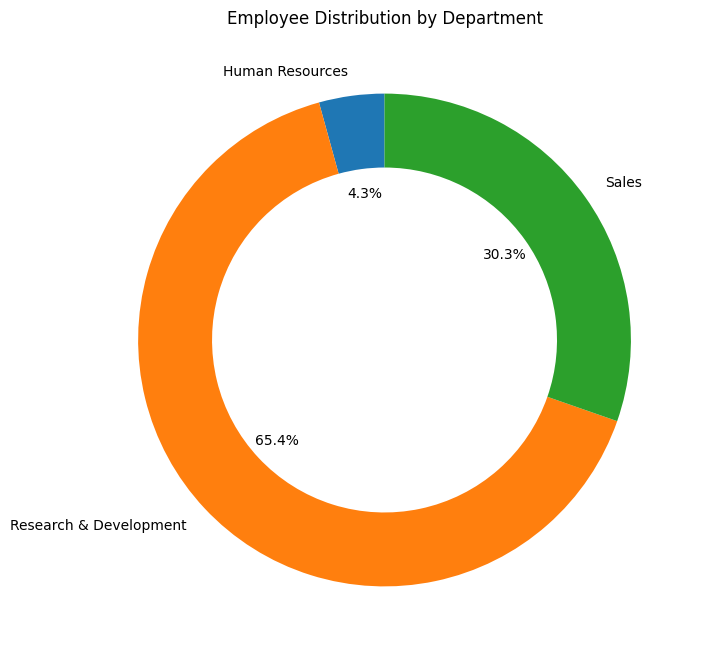

In [69]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the count of employees per department
department_counts = df.groupby('Department')['EmployeeNumber'].count()

# Create a ring chart
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Employee Distribution by Department')
plt.show()

Q2) What is the overall employee attrition rate in the organization?

---



In [28]:

# Step 3: Calculate the total number of employees
total_employees = df.shape[0]

# Step 4: Calculate the number of employees who left (assuming 'Attrition' column has values 'Yes' or 'No')
employees_left = df[df['Attrition'] == 'Yes'].shape[0]

# Step 5: Calculate the attrition rate
attrition_rate = (employees_left / total_employees) * 100

# Step 6: Print the attrition rate
print(f"The employee attrition rate across the organization is {attrition_rate:.2f}%")


The employee attrition rate across the organization is 16.12%


Q3) How does the total number of employees correlate with the number of years they have worked at the company, and what implications does this have for workforce stability?

---


<ipython-input-83-4034838aa2cb>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  years_category_analysis = df.groupby('YearsCategory')['EmployeeNumber'].count()
<ipython-input-83-4034838aa2cb>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_category_analysis = df.groupby('YearsCategory')['AttritionBinary'].sum()


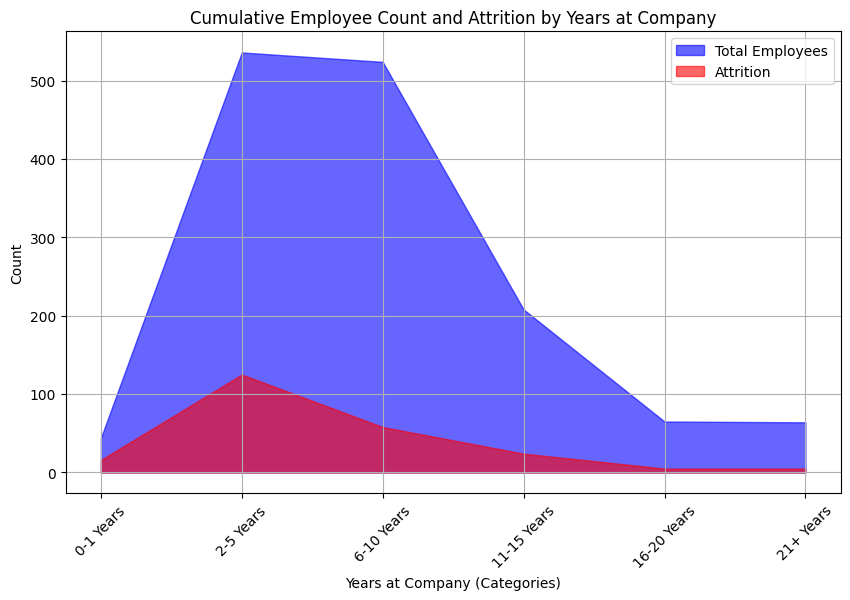

Total Employees Over All Categories: 1441
Total Employees Who Left (Attrition): 233
Overall Attrition Rate: 16.17%

Attrition Percentage by Years at Company Categories:
Category: 0-1 Years, Attrition Rate: 36.36%
Category: 2-5 Years, Attrition Rate: 23.32%
Category: 6-10 Years, Attrition Rate: 11.07%
Category: 11-15 Years, Attrition Rate: 11.54%
Category: 16-20 Years, Attrition Rate: 7.69%
Category: 21+ Years, Attrition Rate: 7.81%

Conclusion: The attrition rate is within acceptable limits, suggesting a stable workforce.


In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and contains the necessary columns

# Step 1: Create a new column for Attrition as binary (Yes=1, No=0)
df['AttritionBinary'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Step 2: Categorize the number of years at the company
bins = [0, 1, 5, 10, 15, 20, 25]  # Define the bins for categorization
labels = ['0-1 Years', '2-5 Years', '6-10 Years', '11-15 Years', '16-20 Years', '21+ Years']
df['YearsCategory'] = pd.cut(df['YearsAtCompany'], bins=bins, labels=labels, right=False)

# Step 3: Grouping the data by YearsCategory and counting the number of employees and attrition
years_category_analysis = df.groupby('YearsCategory')['EmployeeNumber'].count()
attrition_category_analysis = df.groupby('YearsCategory')['AttritionBinary'].sum()

# Step 4: Plotting the area graph
plt.figure(figsize=(10, 6))

# Plotting Total Employees
plt.fill_between(years_category_analysis.index, years_category_analysis.values, label='Total Employees', color='blue', alpha=0.6)

# Plotting Total Attrition
plt.fill_between(attrition_category_analysis.index, attrition_category_analysis.values, label='Attrition', color='red', alpha=0.6)

plt.title('Cumulative Employee Count and Attrition by Years at Company')
plt.xlabel('Years at Company (Categories)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-ticks for better visibility
plt.legend()  # Add a legend
plt.grid(True)
plt.show()

# Step 5: Aggregation and Analysis
total_employees = years_category_analysis.sum()
total_attrition = attrition_category_analysis.sum()
attrition_rate = (total_attrition / total_employees) * 100 if total_employees > 0 else 0

# Display conclusions
print(f"Total Employees Over All Categories: {total_employees}")
print(f"Total Employees Who Left (Attrition): {total_attrition}")
print(f"Overall Attrition Rate: {attrition_rate:.2f}%")

# Detailed analysis by years category
attrition_percentage_by_category = (attrition_category_analysis / years_category_analysis) * 100
print("\nAttrition Percentage by Years at Company Categories:")
for category, percentage in attrition_percentage_by_category.items():
    print(f"Category: {category}, Attrition Rate: {percentage:.2f}%")

# Conclusions
if attrition_rate > 20:
    print("\nConclusion: The attrition rate is relatively high, indicating potential issues with employee satisfaction or engagement.")
else:
    print("\nConclusion: The attrition rate is within acceptable limits, suggesting a stable workforce.")

# Further analysis could include investigating the reasons behind attrition or implementing retention strategies based on the findings.


Q4) Which job roles are most at risk for attrition, and what strategies can we implement to improve retention in those areas?

---



Accuracy of the model: 85.03%
Confusion Matrix:
[[243  12]
 [ 32   7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       255
           1       0.37      0.18      0.24        39

    accuracy                           0.85       294
   macro avg       0.63      0.57      0.58       294
weighted avg       0.82      0.85      0.83       294



<ipython-input-53-c2f32c674acc>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: W

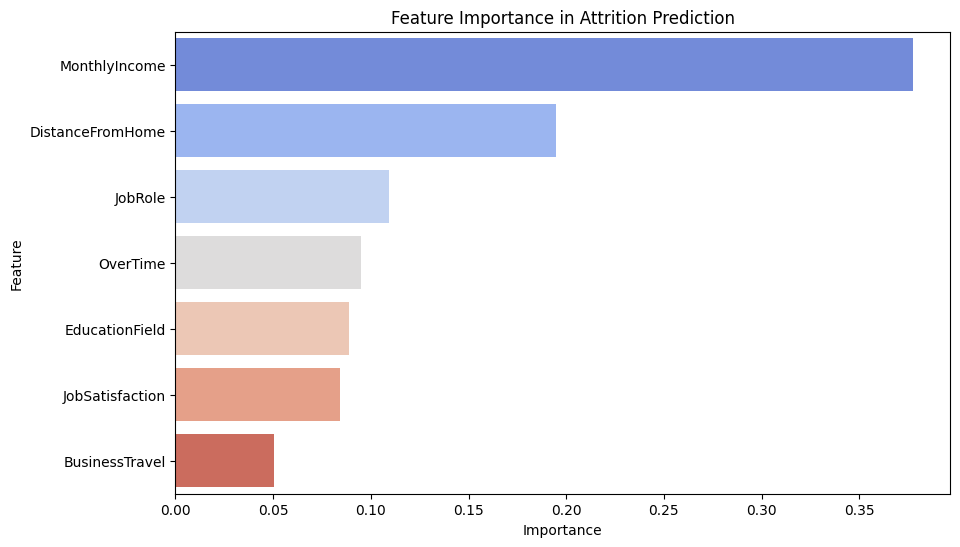

Based on the feature importance analysis, key factors contributing to employee attrition can be identified.
- Suggest retention strategies focusing on improving job satisfaction, offering flexible work options for those working overtime, and adjusting pay scales.


In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
label_encoders = {}
categorical_cols = ['JobRole', 'BusinessTravel', 'EducationField', 'Gender', 'OverTime', 'Attrition']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col]) # Changed 'data' to 'df'


# Defining features and target variable
X = df[['JobSatisfaction', 'DistanceFromHome', 'MonthlyIncome', 'OverTime', 'JobRole', 'BusinessTravel', 'EducationField']] # Changed 'data' to 'df'
y = df['Attrition'] # Changed 'data' to 'df'

# Splitting data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Model Training (Random Forest Classifier)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 6: Model Evaluation
# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Step 7: Feature Importance
# Identify the most important features
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Creating a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Feature Importance in Attrition Prediction')
plt.show()

# Step 8: Insights
print("Based on the feature importance analysis, key factors contributing to employee attrition can be identified.")
print("- Suggest retention strategies focusing on improving job satisfaction, offering flexible work options for those working overtime, and adjusting pay scales.")

Q5) Which job roles are most at risk for attrition?

---



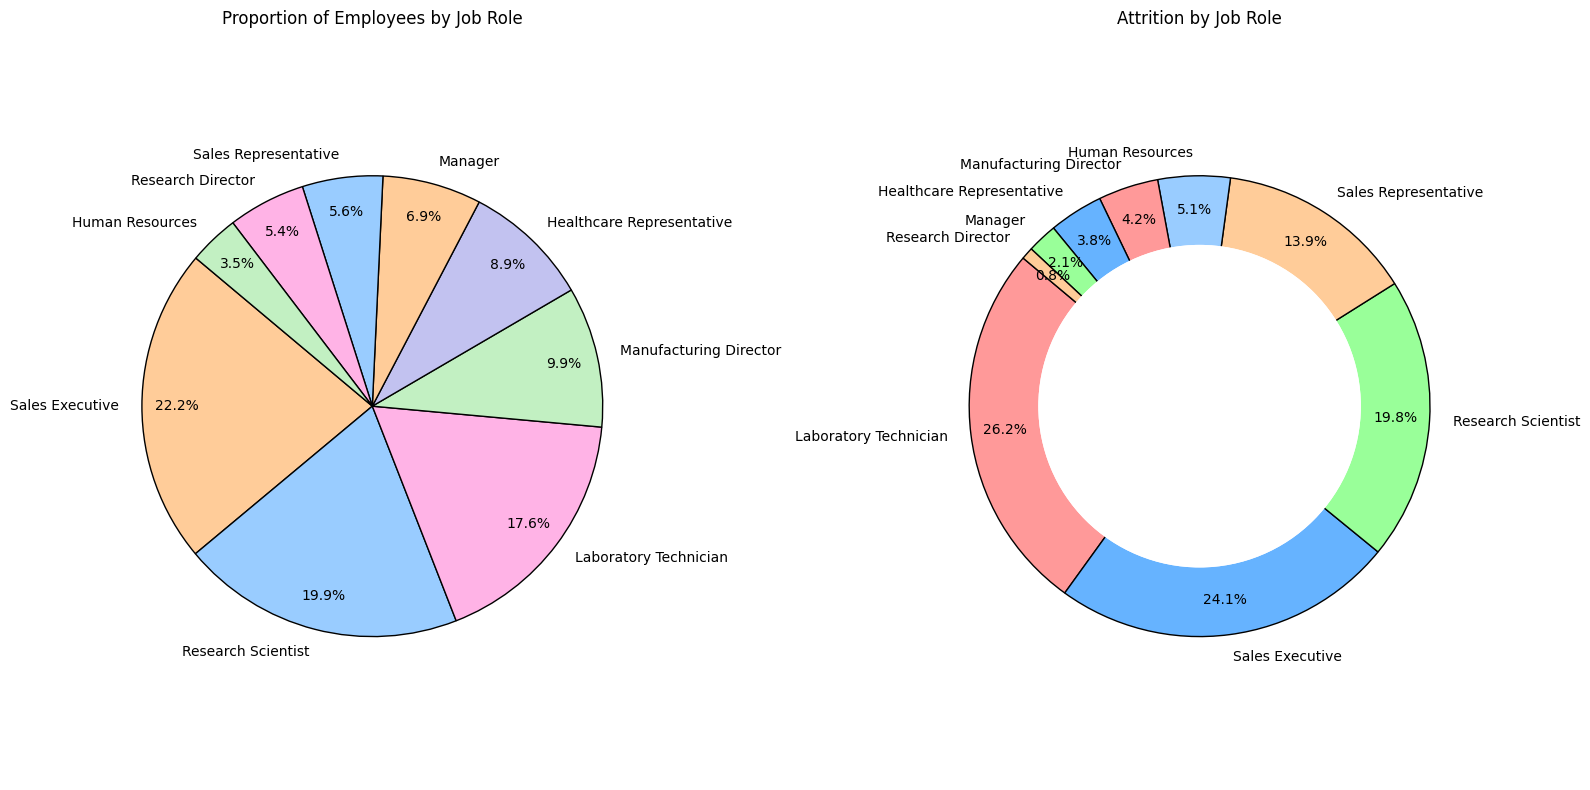

Comparison of Job Role Proportion vs Attrition:
                    Job Role  Proportion of Total Employees (%)  \
0            Sales Executive                          22.176871   
1         Research Scientist                          19.863946   
2      Laboratory Technician                          17.619048   
3     Manufacturing Director                           9.863946   
4  Healthcare Representative                           8.911565   
5                    Manager                           6.938776   
6       Sales Representative                           5.646259   
7          Research Director                           5.442177   
8            Human Resources                           3.537415   

   Proportion of Attrition (%)  
0                    24.050633  
1                    19.831224  
2                    26.160338  
3                     4.219409  
4                     3.797468  
5                     2.109705  
6                    13.924051  
7                

In [ ]:


# 1. Pie chart for proportion of employees by Job Role
jobrole_counts = df['JobRole'].value_counts()

# 2. Pie chart for employees who left (Attrition) by Job Role
attrition_jobrole_counts = df[df['Attrition'] == 'Yes']['JobRole'].value_counts()

# Set up the subplots for side-by-side pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for proportion of employees by Job Role
ax1.pie(jobrole_counts, labels=jobrole_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ffcc99','#99ccff','#ffb3e6','#c2f0c2','#c2c2f0'], wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)
ax1.set_title('Proportion of Employees by Job Role')

# Pie chart for Attrition by Job Role
ax2.pie(attrition_jobrole_counts, labels=attrition_jobrole_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#99ccff'], wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)
ax2.set_title('Attrition by Job Role')

# Draw circle at the center to make them doughnut charts (optional, for aesthetics)
center_circle1 = plt.Circle((0, 0), 0.70, fc='white')
center_circle2 = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle1)
fig.gca().add_artist(center_circle2)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax2.axis('equal')

# Display the charts
plt.tight_layout()
plt.show()

# 3. Generate an analysis report
total_employees = len(df)
total_attrition = len(df[df['Attrition'] == 'Yes'])

# Get proportions
jobrole_proportion = jobrole_counts / total_employees * 100
attrition_proportion = attrition_jobrole_counts / total_attrition * 100

# Print comparison
comparison = pd.DataFrame({
    'Job Role': jobrole_proportion.index,
    'Proportion of Total Employees (%)': jobrole_proportion.values,
    'Proportion of Attrition (%)': attrition_proportion.reindex(jobrole_proportion.index, fill_value=0).values
})

print("Comparison of Job Role Proportion vs Attrition:")
print(comparison)


Q6) How does employee attrition vary by age category and department? Analyze the distribution of attrition across different age groups and departments, and identify which age category and department experience the highest attrition rates. What are the potential reasons behind the trends observed in specific age groups and departments?

---



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


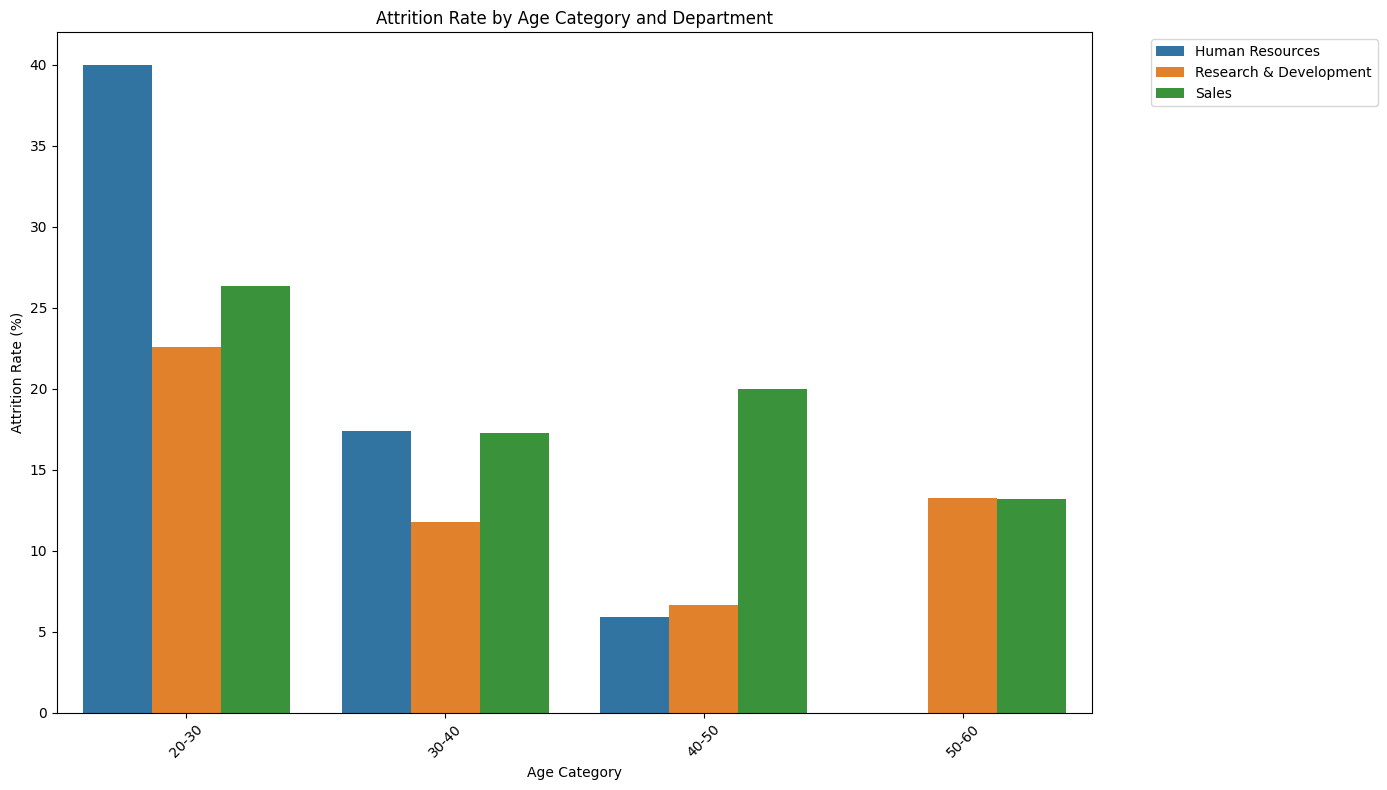


--- Data Analysis and Conclusion ---

Overall Attrition Rate across the organization: 16.12%
The age category with the highest attrition rate is: 20-30 with an average attrition rate of 29.63%
The department with the highest attrition rate is: Human Resources with an average attrition rate of 21.09%

Key Insights:
- Younger employees (20-30) may leave the organization more frequently, possibly due to career growth or better opportunities elsewhere.
- The Human Resources department has the highest attrition rate, indicating potential issues with job satisfaction, workload, or opportunities in that department.


In [66]:

# Step 2: Create age categories
bins = [20, 30, 40, 50, 60]  # Define age ranges
labels = ['20-30', '30-40', '40-50', '50-60']  # Labels for age categories
df['AgeCategory'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Step 3: Calculate attrition rate by age category and department
# First, filter for employees who left (Attrition == 'Yes')
attrition_df = df[df['Attrition'] == 'Yes']

# Calculate attrition rate: number of employees who left / total employees in that age category and department
attrition_rate = attrition_df.groupby(['AgeCategory', 'Department'], observed=True).size() / df.groupby(['AgeCategory', 'Department'], observed=True).size() * 100

# Reset the index to make it easier for plotting
attrition_rate = attrition_rate.reset_index(name='AttritionRate')

# Step 4: Plot the attrition rate by age category and department
plt.figure(figsize=(14, 8))
sns.barplot(x='AgeCategory', y='AttritionRate', hue='Department', data=attrition_rate)
plt.title('Attrition Rate by Age Category and Department')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 5: Generate an analysis of the data
print("\n--- Data Analysis and Conclusion ---\n")

# General attrition rate across age categories
general_attrition_rate = (df[df['Attrition'] == 'Yes'].shape[0] / df.shape[0]) * 100
print(f"Overall Attrition Rate across the organization: {general_attrition_rate:.2f}%")

# Find which age category has the highest attrition rate
highest_attrition_age = attrition_rate.groupby('AgeCategory', observed=True)['AttritionRate'].mean().idxmax()
highest_attrition_value = attrition_rate.groupby('AgeCategory', observed=True)['AttritionRate'].mean().max()
print(f"The age category with the highest attrition rate is: {highest_attrition_age} with an average attrition rate of {highest_attrition_value:.2f}%")

# Find which department has the highest attrition rate
highest_attrition_dept = attrition_rate.groupby('Department', observed=True)['AttritionRate'].mean().idxmax()
highest_attrition_dept_value = attrition_rate.groupby('Department', observed=True)['AttritionRate'].mean().max()
print(f"The department with the highest attrition rate is: {highest_attrition_dept} with an average attrition rate of {highest_attrition_dept_value:.2f}%")

# Provide insights on key findings
print("\nKey Insights:")
if highest_attrition_age == '20-30':
    print("- Younger employees (20-30) may leave the organization more frequently, possibly due to career growth or better opportunities elsewhere.")
elif highest_attrition_age == '30-40':
    print("- Employees in the 30-40 age range may be leaving due to career plateauing or seeking better work-life balance.")
elif highest_attrition_age == '40-50':
    print("- Attrition in the 40-50 age group may indicate mid-career shifts, dissatisfaction, or burnout.")
else:
    print("- The 50-60 age category shows higher attrition, possibly related to retirement plans or job dissatisfaction toward the later stage of their careers.")

print(f"- The {highest_attrition_dept} department has the highest attrition rate, indicating potential issues with job satisfaction, workload, or opportunities in that department.")


Q7) What patterns can be identified in the attrition rates of employees based on their distance from home, and how might these insights inform organizational policies regarding remote work or flexible hours?

---


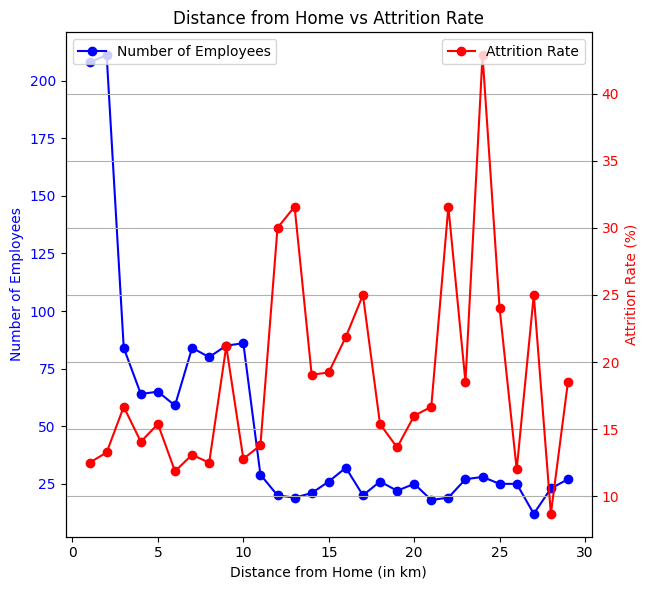

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and contains the necessary columns

# Step 1: Create a new column for Attrition as binary (Yes=1, No=0)
df['AttritionBinary'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Step 2: Calculate average attrition rate based on distance from home
distance_attrition = df.groupby('DistanceFromHome')['AttritionBinary'].mean() * 100  # Convert to percentage

# Step 3: Plot the data
plt.figure(figsize=(12, 6))

# Subplot 2: Dual-axis Plot
plt.subplot(1, 2, 2)
ax1 = plt.gca()
ax1.set_title('Distance from Home vs Attrition Rate')
ax1.set_xlabel('Distance from Home (in km)')
ax1.set_ylabel('Number of Employees', color='blue')
distance_counts = df['DistanceFromHome'].value_counts().sort_index()
ax1.plot(distance_counts.index, distance_counts.values, marker='o', linestyle='-', color='blue', label='Number of Employees')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the attrition rate
ax2 = ax1.twinx()
ax2.set_ylabel('Attrition Rate (%)', color='red')
ax2.plot(distance_attrition.index, distance_attrition.values, marker='o', linestyle='-', color='red', label='Attrition Rate')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.show()


Q8) How does career growth, in terms of years since the last promotion and years in the current role, relate to employee job satisfaction and attrition rates? What insights can be gained from this correlation to design effective career development programs aimed at improving employee retention and satisfaction?

---



Correlation Matrix:
                         YearsSinceLastPromotion  YearsInCurrentRole  \
YearsSinceLastPromotion                 1.000000            0.548056   
YearsInCurrentRole                      0.548056            1.000000   
JobSatisfaction                        -0.018214           -0.002305   
AttritionBinary                        -0.033019           -0.160545   

                         JobSatisfaction  AttritionBinary  
YearsSinceLastPromotion        -0.018214        -0.033019  
YearsInCurrentRole             -0.002305        -0.160545  
JobSatisfaction                 1.000000        -0.103481  
AttritionBinary                -0.103481         1.000000  


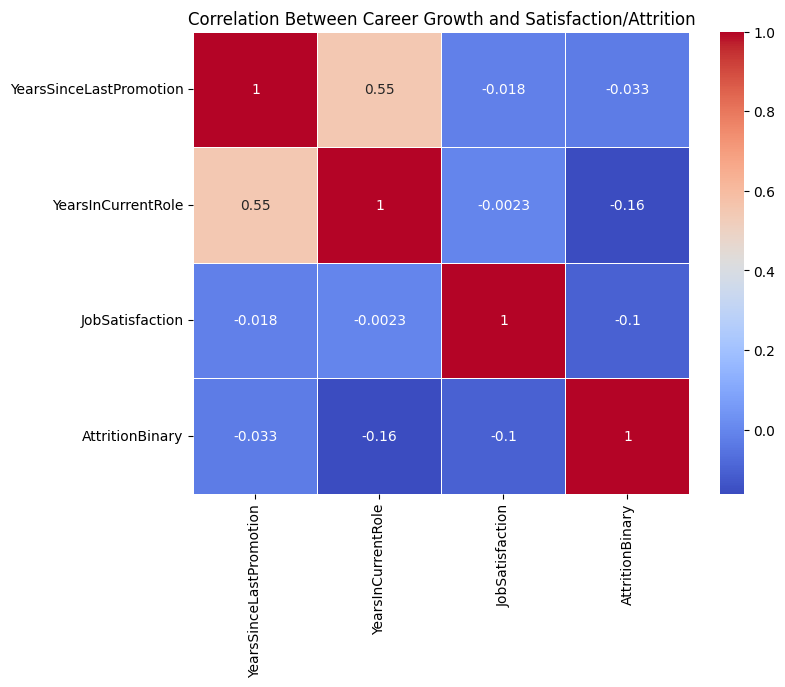

Based on the analysis, insights can be drawn such as:
- Employees with long gaps since their last promotion may have lower job satisfaction and higher attrition.
- Employees remaining in the same role for extended periods might show signs of reduced satisfaction or are more likely to leave.
- Propose career development programs to retain top talent and increase satisfaction.


In [33]:
# Step 3: Correlation Analysis
# Calculating the correlation matrix between relevant features
correlation_matrix = df[['YearsSinceLastPromotion', 'YearsInCurrentRole', 'JobSatisfaction', 'AttritionBinary']].corr() # Changed 'Attrition' to 'AttritionBinary'

# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 4: Visualizing the Correlations

#Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Career Growth and Satisfaction/Attrition")
plt.show()
# Step 6: Insights and Conclusion
print("Based on the analysis, insights can be drawn such as:")
print("- Employees with long gaps since their last promotion may have lower job satisfaction and higher attrition.")
print("- Employees remaining in the same role for extended periods might show signs of reduced satisfaction or are more likely to leave.")
print("- Propose career development programs to retain top talent and increase satisfaction.")

Q9) Is there a gender pay gap within the organization, and how does it impact employee satisfaction and retention?

---



Gender-wise Salary, Satisfaction, and Promotion Stats:
       MonthlyIncome         JobSatisfaction YearsSinceLastPromotion
                mean  median            mean                    mean
Gender                                                              
0        6686.566327  5081.5        2.683673                2.294218
1        6380.507937  4837.5        2.758503                2.116780


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  stats = pd.DataFrame(mpl.cbook.boxplot_stats(value_data, whis=whis,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a futu

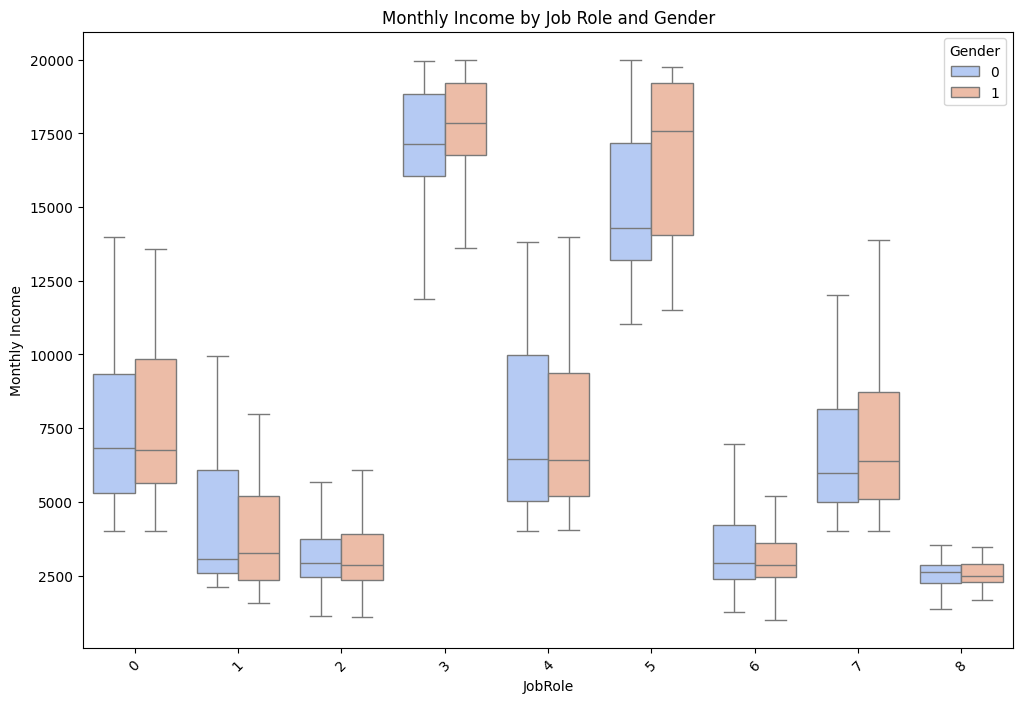

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  stats = pd.DataFrame(mpl.cbook.boxplot_stats(value_data, whis=whis,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a futu

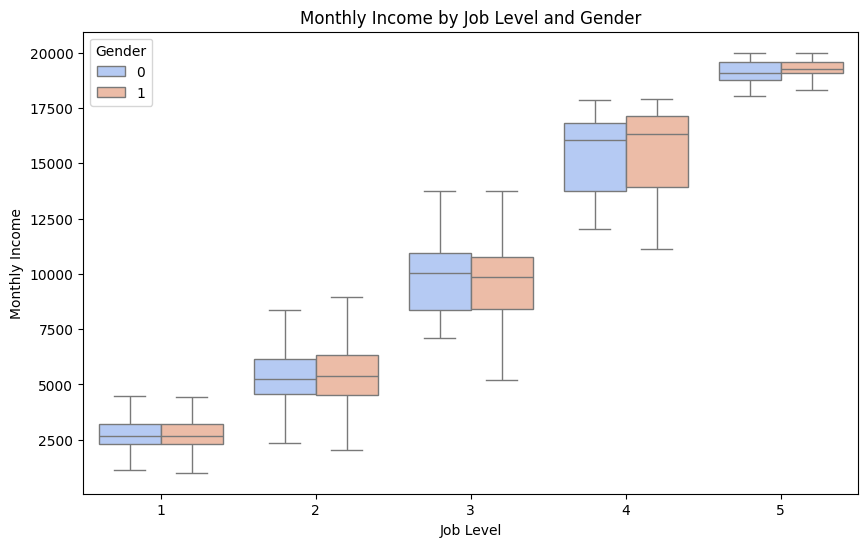

Based on the analysis, insights can be drawn such as:
- The boxplots show salary distribution differences by gender.
- Analyze job satisfaction and promotion gaps to understand the impact of gender on retention.
- Use these insights to recommend strategies for closing any gender pay gap or promotion inequalities.


In [17]:
# Step 3: Basic Gender-wise Salary Distribution Analysis
# Create a new column to show salary levels based on monthly income
df['SalaryLevel'] = pd.qcut(df['MonthlyIncome'], q=4, labels=["Low", "Medium", "High", "Very High"])

# Step 4: Grouping Data by Gender
# Group data by Gender to see salary distribution, job level, and satisfaction
grouped_gender = df.groupby('Gender').agg({
    'MonthlyIncome': ['mean', 'median'],
    'JobSatisfaction': 'mean',
    'YearsSinceLastPromotion': 'mean'
})

print("Gender-wise Salary, Satisfaction, and Promotion Stats:")
print(grouped_gender)



# Step 6: Salary Distribution by Gender and Job Role
plt.figure(figsize=(12, 8))
sns.boxplot(x='JobRole', y='MonthlyIncome', hue='Gender', data=df, palette='coolwarm', showfliers=False) # Added showfliers=False to remove outliers
plt.title("Monthly Income by Job Role and Gender")
plt.ylabel("Monthly Income")
plt.xticks(rotation=45)
plt.show()

# Step 7: Salary Distribution by Gender and Job Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobLevel', y='MonthlyIncome', hue='Gender', data=df, palette='coolwarm', showfliers=False) # Added showfliers=False to remove outliers
plt.title("Monthly Income by Job Level and Gender")
plt.ylabel("Monthly Income")
plt.xlabel("Job Level")
plt.show()

# Step 10: Insights and Conclusion
print("Based on the analysis, insights can be drawn such as:")
print("- The boxplots show salary distribution differences by gender.")
print("- Analyze job satisfaction and promotion gaps to understand the impact of gender on retention.")
print("- Use these insights to recommend strategies for closing any gender pay gap or promotion inequalities.")

Q10) How does the average training received and years of experience vary among different job roles within the organization, and what insights can be drawn regarding employee development and retention?

---


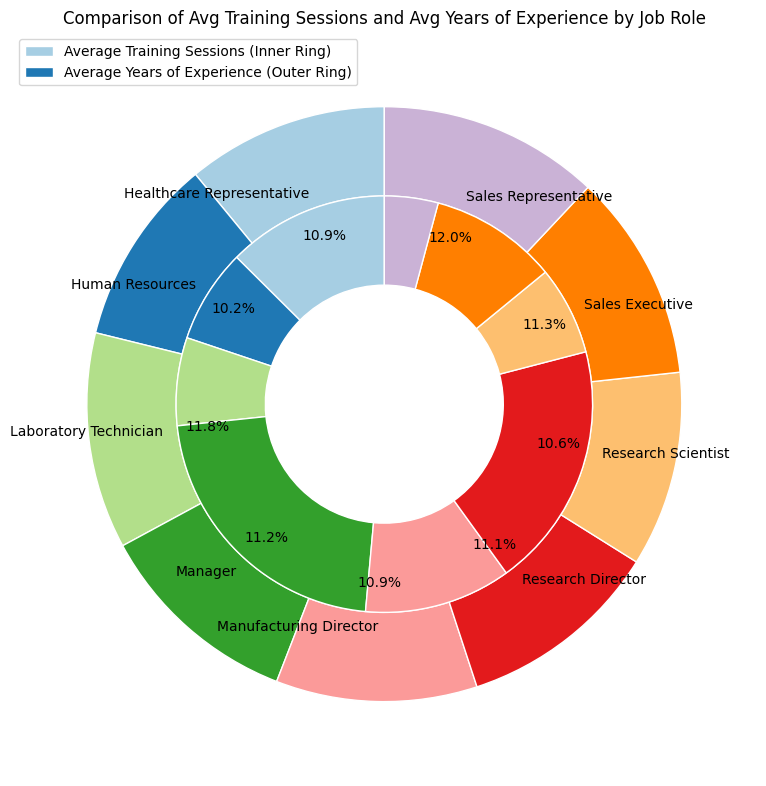

Sales Executives have higher average training sessions, indicating a focus on skill development. Managers possess more years of experience, suggesting stability in their roles.


In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and contains the necessary columns

# Step 1: Filter relevant columns for skill development
skill_development_data = df[['EmployeeNumber', 'TrainingTimesLastYear', 'TotalWorkingYears', 'JobRole']]

# Step 2: Group the data by Job Role and calculate the average training sessions and years of experience per job role
skill_analysis = skill_development_data.groupby('JobRole').agg({
    'TrainingTimesLastYear': 'mean',
    'TotalWorkingYears': 'mean'
}).reset_index()

# Step 3: Create the donut chart
fig, ax = plt.subplots(figsize=(8, 8))

# Inner ring (Average Training Sessions)
inner_values = skill_analysis['TrainingTimesLastYear']
outer_values = skill_analysis['TotalWorkingYears']
labels = skill_analysis['JobRole']

# Plotting the inner ring (Average Training Sessions)
ax.pie(inner_values, radius=1, labels=labels, colors=plt.cm.Paired(range(len(inner_values))),
       wedgeprops=dict(width=0.3, edgecolor='w'), labeldistance=0.75, autopct='%1.1f%%', startangle=90)

# Plotting the outer ring (Average Years of Experience)
ax.pie(outer_values, radius=0.7, colors=plt.cm.Paired(range(len(outer_values))),
       wedgeprops=dict(width=0.3, edgecolor='w'), startangle=90, labeldistance=0.6)

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=0)
fig.gca().add_artist(centre_circle)

# Step 4: Adding a legend to clarify what each ring represents
legend_labels = ['Average Training Sessions (Inner Ring)', 'Average Years of Experience (Outer Ring)']
plt.legend(legend_labels, loc='upper left')

plt.title('Comparison of Avg Training Sessions and Avg Years of Experience by Job Role')
plt.tight_layout()
plt.show()

# Short analysis summary
print("Sales Executives have higher average training sessions, indicating a focus on skill development. Managers possess more years of experience, suggesting stability in their roles.")
